# Import library

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

# Data Collection and Processing

In [2]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer() 

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
#print the dataframe
print(data_frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [6]:
#adding the target column to the dataframe
data_frame['label'] = breast_cancer_dataset.target

In [7]:
#print last 5 raw to the dataframe
data_frame.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
564                0.2216          0.2060                  0.07115      0  
565                0.1628          0.2572                  0.06637      0  
566                0.1418          0.2218                  0.07820      0  
567                0.2650          0.4087                  0.12400      0  
568                0.0000          0.2871                  0.07039      1  

[5 rows x 31 columns]

In [8]:
#number of rows and columns in dataset
data_frame.shape

(569, 31)

In [9]:
#getting some about the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
#checking the missing value
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
#statistical measures about the dataset
data_frame.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       label  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [12]:
#checking the distribution of target variable
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

357 = benign cases
212 = malignant cases

In [13]:
data_frame.groupby('label').mean()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
label                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
label                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
label                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
label                                                                      
0           141.370330  1422.286321          0.144845           0.374824   
1            87.005938   558.899440          0.124959           0.182673   

       worst concavity  worst concave points  worst symmetry  \
label                                                          
0             0.450606              0.182237        0.323468   
1             0.166238              0.074444        0.270246   

       worst fractal dimension  
label                           
0                     0.091530  
1                     0.079442  

[2 rows x 30 columns]

#Seprating the feature and target 

In [14]:
x = data_frame.drop(columns = 'label', axis =1)
y = data_frame['label']

In [15]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

#Splitting the data into training data and testing data 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 2) 

In [17]:
print(x.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#Model Logistic Regression 

In [18]:
model1 = LogisticRegression()

In [19]:
#training the Logistic Regression
model1.fit(X_train, Y_train)

C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Modeling Evaluation
#Accuracy Score

In [20]:
#accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [21]:
print('Accuracy on training data', training_data_accuracy)

Accuracy on training data 0.9494505494505494


In [22]:
#accuracy on testing data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [23]:
print('Accuracy on testing data', test_data_accuracy)

Accuracy on testing data 0.9298245614035088


In [24]:
input_data = (19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one datapoint
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshape)
print(prediction)

if(prediction[0] == 0):
    print("The breast cancer is Malignant")
else:
    print("The breast cancer is benign")

[0]
The breast cancer is Malignant


C:\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Bulding the Neural Network

In [25]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
#setting up the layer of Neural Network
model  = keras.Sequential([
                            keras.layers.Flatten(input_shape =(30,)),
                            keras.layers.Dense(20, activation = 'relu'),
                            keras.layers.Dense(2, activation = 'sigmoid') # sigmoid is used for logistic regression
])

In [27]:
#compiling the Neural Network
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
#training the model
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 4s 62ms/step - loss: 50.6928 - accuracy: 0.3692 - val_loss: 19.3401 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 7.4481 - accuracy: 0.6235 - val_loss: 5.9457 - val_accuracy: 0.6739
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 2.3367 - accuracy: 0.7433 - val_loss: 2.2841 - val_accuracy: 0.4783
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 1.2271 - accuracy: 0.8020 - val_loss: 0.9573 - val_accuracy: 0.8696
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.8753 - val_loss: 0.4650 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4732 - accuracy: 0.8900 - val_loss: 0.3526 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4279 - accuracy: 0.8875 - val_loss: 0.3530 - val_accuracy: 0.9565
Epoch 8/10
13/13

# Standardize the data


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [31]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [32]:
#training the model
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 10) #epochs mean no of time visited the data

Epoch 1/10
13/13 [==============================] - 1s 29ms/step - loss: 0.7110 - accuracy: 0.6064 - val_loss: 0.4576 - val_accuracy: 0.8478
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3657 - accuracy: 0.8973 - val_loss: 0.2399 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2575 - accuracy: 0.9267 - val_loss: 0.1857 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9315 - val_loss: 0.1615 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1867 - accuracy: 0.9462 - val_loss: 0.1464 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1673 - accuracy: 0.9584 - val_loss: 0.1351 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9658 - val_loss: 0.1257 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

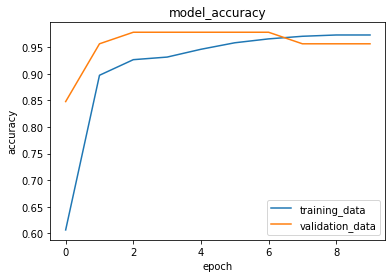

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_data', 'validation_data'], loc = 'lower right')

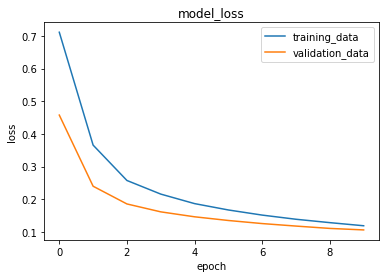

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_data', 'validation_data'], loc = 'upper right')

In [35]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1175 - accuracy: 0.9737
0.9736841917037964


In [36]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [37]:
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

4/4 [==============================] - 0s 3ms/step
(114, 2)
[0.2304826 0.5875476]


In [38]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [39]:
print(Y_pred)

[[0.2304826  0.5875476 ]
 [0.419357   0.45424652]
 [0.05509945 0.8110226 ]
 [0.9998456  0.01836812]
 [0.30278662 0.3732339 ]
 [0.9948337  0.13412187]
 [0.33709055 0.618307  ]
 [0.02077485 0.8205663 ]
 [0.10216026 0.7512677 ]
 [0.03414907 0.5822396 ]
 [0.54305065 0.5826916 ]
 [0.169894   0.7295731 ]
 [0.22827391 0.6259267 ]
 [0.23545292 0.725756  ]
 [0.08225456 0.711833  ]
 [0.94252276 0.01034954]
 [0.05804545 0.76496994]
 [0.04302103 0.7330542 ]
 [0.06964899 0.63266814]
 [0.99474853 0.28129894]
 [0.5061016  0.9276033 ]
 [0.04368072 0.7079918 ]
 [0.04872705 0.7726306 ]
 [0.02118807 0.75784194]
 [0.12578239 0.48166838]
 [0.96325666 0.15563904]
 [0.11506855 0.67130613]
 [0.20009202 0.48447052]
 [0.93097335 0.11142668]
 [0.95853513 0.08656624]
 [0.04433012 0.4583727 ]
 [0.10341594 0.77525276]
 [0.03556415 0.6509157 ]
 [0.998638   0.10857492]
 [0.9932117  0.21539867]
 [0.15737581 0.55461603]
 [0.03592984 0.8456869 ]
 [0.20324902 0.64967895]
 [0.03446059 0.8297182 ]
 [0.11342251 0.7179752 ]


model.predict() gives the prediction of each class for the data point

In [40]:
#converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels) #comparing which one is greater than to give the output

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [41]:
input_data = (15.78,22.91,105.7,782.6,0.1155,0.1752,0.2133,0.09479,0.2096,0.07331,0.552,1.072,3.598,58.63,0.008699,0.03976,0.0595,0.0139,0.01495,0.005984,20.19,30.5,130.3,1272,0.1855,0.4925,0.7356,0.2034,0.3274,0.1252)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are prediction for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

1/1 [==============================] - 0s 65ms/step
[[0.9900603  0.43570462]]
[0]
The tumor is Malignant


C:\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
#checking the distribution of target variable
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [43]:
data_frame.to_csv("Breath_cancer.csv")

In [44]:
df = pd.read_csv("Breath_cancer.csv")

In [45]:
df

Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0             0        17.99         10.38          122.80     1001.0   
1             1        20.57         17.77          132.90     1326.0   
2             2        19.69         21.25          130.00     1203.0   
3             3        11.42         20.38           77.58      386.1   
4             4        20.29         14.34          135.10     1297.0   
..          ...          ...           ...             ...        ...   
564         564        21.56         22.39          142.00     1479.0   
565         565        20.13         28.25          131.20     1261.0   
566         566        16.60         28.08          108.30      858.1   
567         567        20.60         29.33          140.10     1265.0   
568         568         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     mean symmetry  ...  worst texture  worst perimeter  worst area  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
0                  0.2654          0.4601                  0.11890      0  
1                  0.1860          0.2750                  0.08902      0  
2                  0.2430          0.3613                  0.08758      0  
3                  0.2575          0.6638                  0.17300      0  
4                  0.1625          0.2364                  0.07678      0  
..                    ...             ...                      ...    ...  
564                0.2216          0.2060                  0.

In [46]:
###Independent and Dependent model
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
x.head()

Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst radius  worst texture  worst perimeter  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [49]:
def get_column_name(name):
    name = str(name).lower()
    name = name.replace(' ', '_')
    return name
for column_name in df.columns:
    df.rename(columns = {column_name:get_column_name(column_name)}, inplace = True)
df = df.drop(columns=['unnamed:_0'])
df.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  label  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [50]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

<AxesSubplot:>

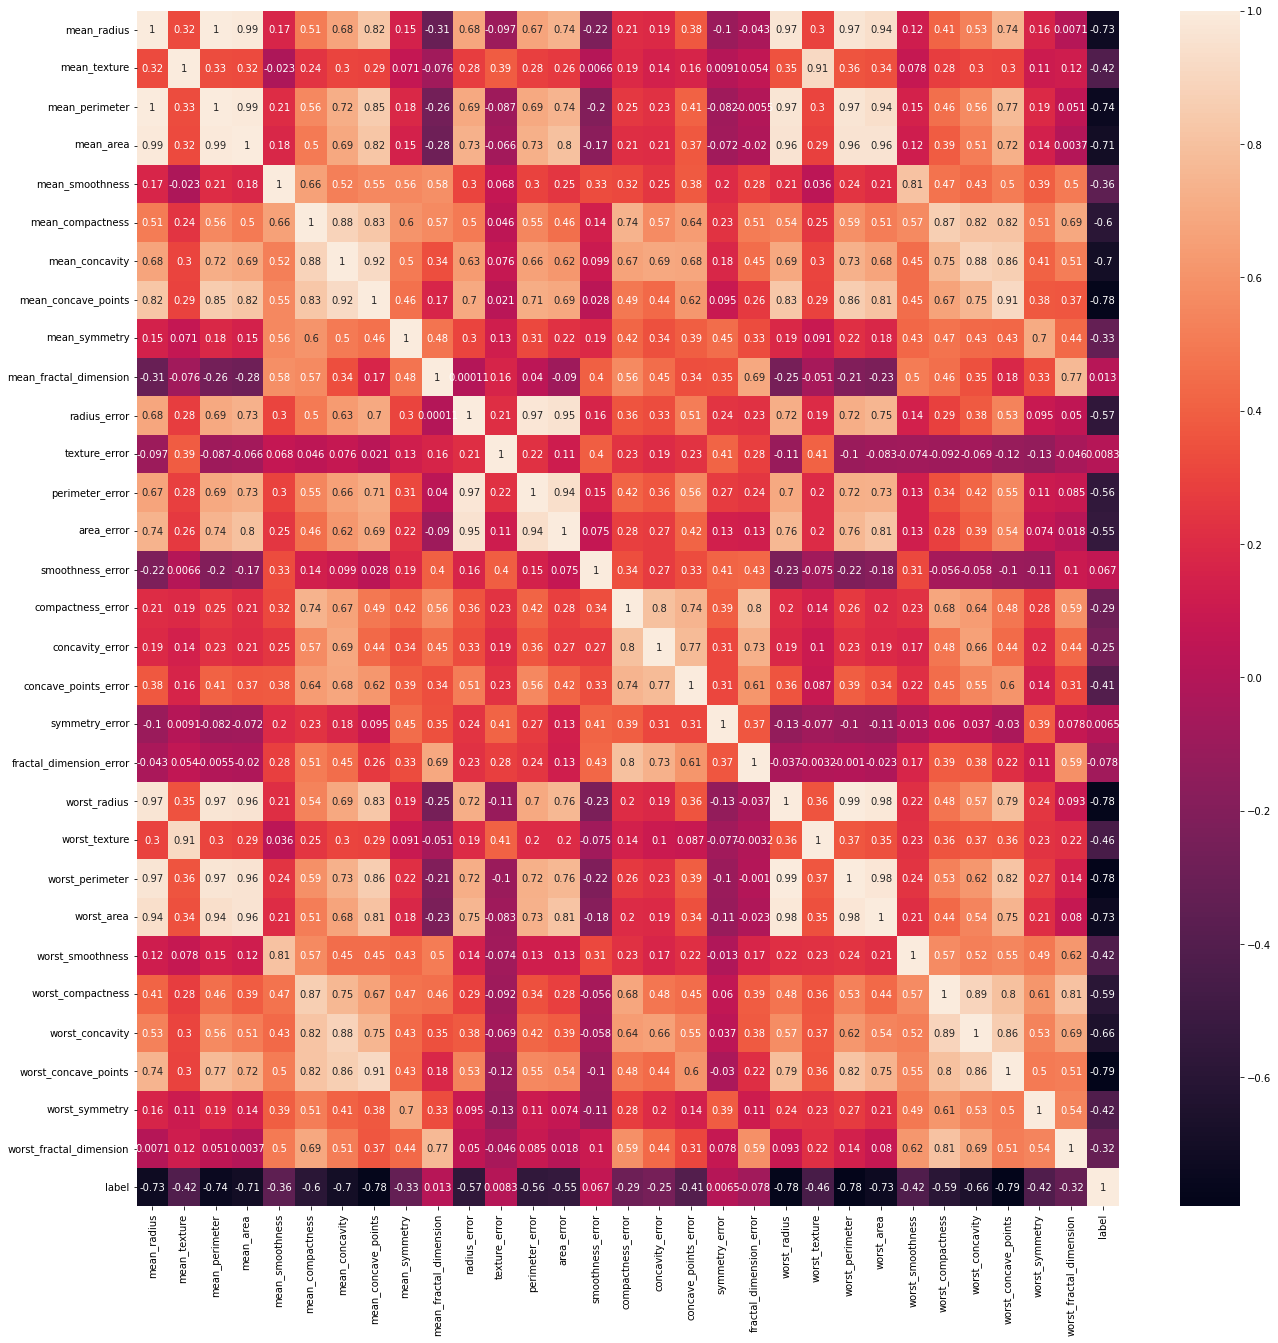

In [51]:
import seaborn as sns
plt.figure(figsize = (22, 22))
sns.heatmap(df.corr(), annot=True)

In [52]:
df = df.drop(columns=['worst_symmetry', 'worst_fractal_dimension', 'worst_smoothness', 'worst_texture', 'symmetry_error', 'fractal_dimension_error', 'smoothness_error', 'texture_error', 'mean_fractal_dimension', 'mean_texture', 'mean_smoothness', 'mean_symmetry', 'compactness_error', 'concavity_error', 'concave_points_error'])

In [53]:
df.head()

mean_radius  mean_perimeter  mean_area  mean_compactness  mean_concavity  \
0        17.99          122.80     1001.0           0.27760          0.3001   
1        20.57          132.90     1326.0           0.07864          0.0869   
2        19.69          130.00     1203.0           0.15990          0.1974   
3        11.42           77.58      386.1           0.28390          0.2414   
4        20.29          135.10     1297.0           0.13280          0.1980   

   mean_concave_points  radius_error  perimeter_error  area_error  \
0              0.14710        1.0950            8.589      153.40   
1              0.07017        0.5435            3.398       74.08   
2              0.12790        0.7456            4.585       94.03   
3              0.10520        0.4956            3.445       27.23   
4              0.10430        0.7572            5.438       94.44   

   worst_radius  worst_perimeter  worst_area  worst_compactness  \
0         25.38           184.60      2019.0             0.6656   
1         24.99           158.80      1956.0             0.1866   
2         23.57           152.50      1709.0             0.4245   
3         14.91            98.87       567.7             0.8663   
4         22.54           152.20      1575.0             0.2050   

   worst_concavity  worst_concave_points  label  
0           0.7119                0.2654      0  
1           0.2416                0.1860      0  
2           0.4504                0.2430      0  
3           0.6869                0.2575      0  
4           0.4000                0.1625      0

<AxesSubplot:>

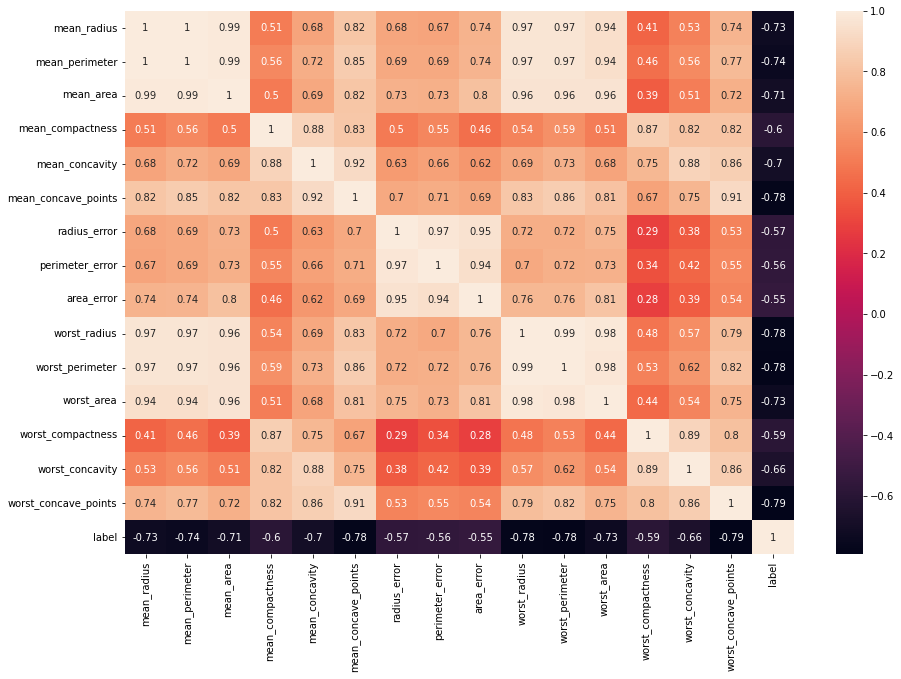

In [54]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True)

In [55]:
X = df.drop(columns=['label'])
y = df['label']

In [56]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [57]:
#implement random classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
# performing predictions on the test dataset
y_pred = classifier.predict(x_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9532163742690059


In [59]:
#check Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [60]:
score

0.9532163742690059

In [61]:
#creating a pickle file using serial serialization
import pickle
pickle_out = open("classifier4.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [62]:
for i in df.columns:
    print(i, ":", df[i].dtype)

mean_radius : float64
mean_perimeter : float64
mean_area : float64
mean_compactness : float64
mean_concavity : float64
mean_concave_points : float64
radius_error : float64
perimeter_error : float64
area_error : float64
worst_radius : float64
worst_perimeter : float64
worst_area : float64
worst_compactness : float64
worst_concavity : float64
worst_concave_points : float64
label : int64


# Checking API working prediction


In [63]:
model.predict([[19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758]])

1/1 [==============================] - 0s 81ms/step


array([[1., 1.]], dtype=float32)

In [64]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

# Visualization


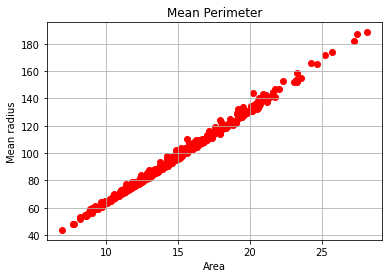

In [65]:
#Scatter
plt.scatter(x= df['mean_radius'], y= df['mean_perimeter'], color = 'red')
plt.xlabel('Area')
plt.ylabel('Mean radius')
plt.title('Mean Perimeter')
plt.grid()
plt.show()

Text(0, 0.5, 'Radius Error')

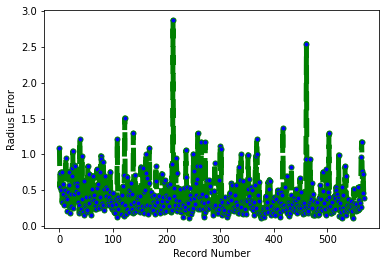

In [66]:
plt.plot(df['radius_error'],marker = 'o', markerfacecolor = 'Blue', markersize = 5, color = 'green', linewidth = 5, linestyle = 'dashed')
plt.xlabel('Record Number')
plt.ylabel('Radius Error')

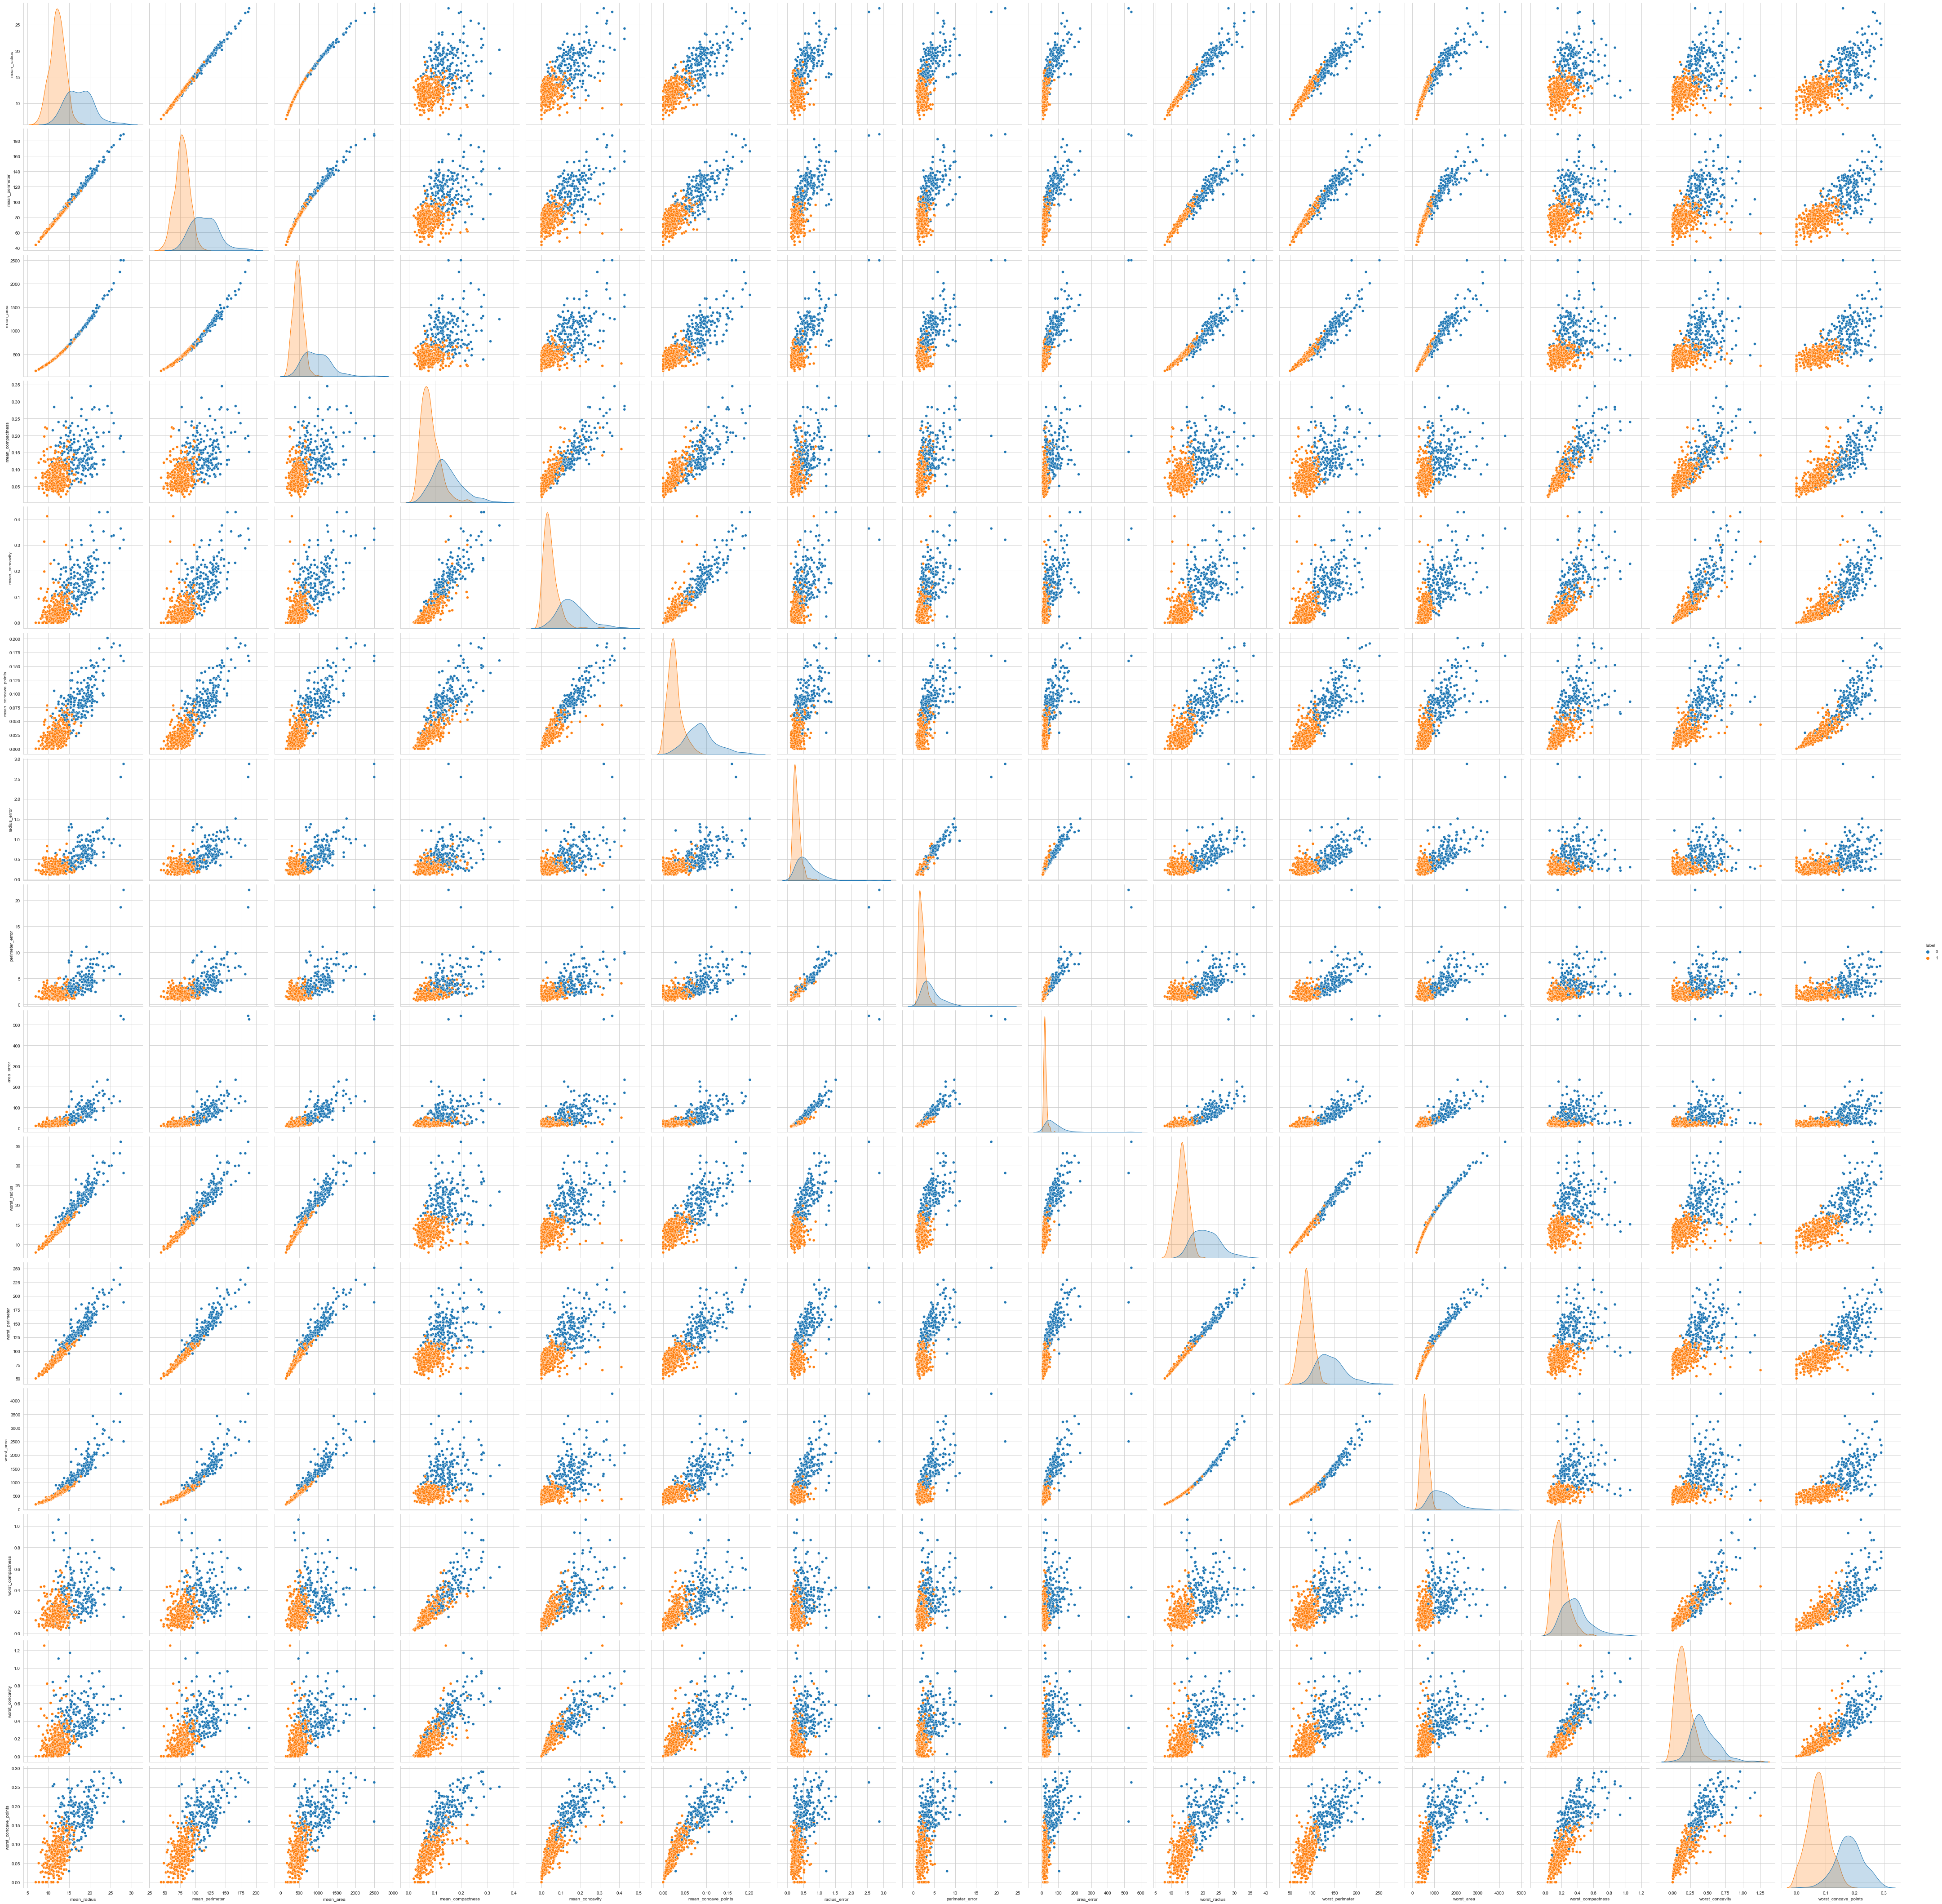

In [67]:
sns.set_style('whitegrid')
sns.pairplot(df, hue ='label', height=4)
plt.show()

In [68]:
q1 = df['mean_concave_points'].quantile(0.25)
q2 = df['mean_concave_points'].quantile(0.75)
iqr = q2 - q1
iqr

0.053689999999999995

In [69]:
Upper_limit = q2 + 1.5*iqr
Lower_limit = q1 - 1.5*iqr
Upper_limit, Lower_limit

(0.15453499999999998, -0.060224999999999994)